Efficient Estimation of Word Representations in Vector Space

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim

In [18]:
class Word2Vec(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super(Word2Vec, self).__init__()

        # Camada de embedding
        self.embedding = nn.Embedding(vocab_size, embedding_dim)

        # Camada linear para a previsão da palavra central
        self.linear1 = nn.Linear(embedding_dim, vocab_size)

        # Camada linear para a previsão do contexto
        self.linear2 = nn.Linear(embedding_dim, vocab_size)

    def forward(self, center_word, context_word):
        # Embedding da palavra central
        center_embed = self.embedding(center_word)

        # Embedding do contexto
        context_embed = self.embedding(context_word)

        # Previsão da palavra central
        center_output = self.linear1(center_embed)

        # Previsão do contexto
        context_output = self.linear2(context_embed)

        return center_output, context_output


In [19]:
# Tamanho do vocabulário
vocab_size = 10000

# Tamanho da camada de embedding
embedding_dim = 200

# Janela de contexto
context_window = 5

# Número de amostras negativas
num_negative_samples = 5

# Taxa de aprendizagem
learning_rate = 0.01

# Número de épocas de treinamento
num_epochs = 20

In [20]:
# Instanciando o modelo
model = Word2Vec(vocab_size, embedding_dim)

# Função de perda
criterion = nn.CrossEntropyLoss()

# Otimizador
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [21]:
def train(model, data, optimizer, criterion, num_epochs):
    for epoch in range(num_epochs):
        running_loss = 0.0
        for center_word, context_word, target in data:
            # Zerando os gradientes
            optimizer.zero_grad()

            # Previsão do modelo
            center_output, context_output = model(center_word, context_word)

            # Calculando a perda
            loss = criterion(center_output, target) + criterion(context_output, target)

            # Backpropagation e atualização dos parâmetros
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, running_loss))

In [22]:
# Carregando os dados
data = [('gato', 'rato', 1), ('cachorro', 'gato', 1), ('gato', 'cachorro', 1), ('rato', 'cachorro', 1),
        ('elefante', 'rato', 0), ('leão', 'elefante', 0), ('cachorro', 'elefante', 0), ('leão', 'gato', 0)]

# Convertendo as palavras para índ
word_to_idx = {}
idx_to_word = {}
for i, (center_word, context_word, target) in enumerate(data):
    if center_word not in word_to_idx:
        word_to_idx[center_word] = len(word_to_idx)
        idx_to_word[len(idx_to_word)] = center_word
    if context_word not in word_to_idx:
        word_to_idx[context_word] = len(word_to_idx)
        idx_to_word[len(idx_to_word)] = context_word
    data[i] = (word_to_idx[center_word], word_to_idx[context_word], target)

# Convertendo os dados para tensores
data = torch.tensor(data)

# Treinando o modelo
train(model, data, optimizer, criterion, num_epochs)

Epoch [1/10], Loss: 141.4017
Epoch [2/10], Loss: 33.2883
Epoch [3/10], Loss: 6.4937
Epoch [4/10], Loss: 4.8177
Epoch [5/10], Loss: 7.9622
Epoch [6/10], Loss: 6.3801
Epoch [7/10], Loss: 4.6946
Epoch [8/10], Loss: 5.6635
Epoch [9/10], Loss: 6.1310
Epoch [10/10], Loss: 5.5411


In [23]:
import matplotlib.pyplot as plt
# Biblioteca para reduzir a dimensionalidade das embeddings
from sklearn.manifold import TSNE
import numpy as np

In [24]:
# Obtendo os vetores de embedding
embeddings = model.embedding.weight.data

# Imprimindo os vetores de embedding para algumas palavras
print('Embedding para a palavra "gato":', embeddings[word_to_idx['gato']])
print('Embedding para a palavra "rato":', embeddings[word_to_idx['rato']])
print('Embedding para a palavra "cachorro":', embeddings[word_to_idx['cachorro']])

Embedding para a palavra "gato": tensor([ 3.0483e-01,  8.5496e-01, -1.2244e-01, -6.2415e-01, -5.9140e-01,
        -4.7496e-01,  6.9069e-01, -6.1637e-01, -1.9053e+00,  7.9548e-01,
         1.0707e+00,  5.8689e-01, -1.9917e-01,  1.3909e+00, -1.2101e+00,
        -1.1579e+00,  4.6051e-02, -4.0132e+00, -4.0841e-01,  1.0096e+00,
         1.0960e+00, -1.3286e+00, -1.0950e-01, -3.7208e-01,  3.8933e-01,
        -1.4654e-01, -2.0749e+00,  6.2225e-01, -1.5428e+00, -9.7608e-01,
        -1.0635e+00, -6.2620e-01, -1.7660e-01,  2.0562e-01, -1.0607e-01,
        -5.2933e-01,  6.2302e-01, -9.6917e-02, -6.0929e-01,  5.5457e-02,
         8.8858e-03,  3.9160e-01, -1.6044e+00, -9.6410e-01, -1.1021e+00,
        -4.6172e-01,  7.3439e-01, -3.7938e-01, -2.4311e-01,  4.6182e-01,
        -1.1727e+00,  3.0106e-01,  2.3438e-01,  1.0184e+00,  1.6891e+00,
        -2.2783e-01, -4.8238e-01, -1.3411e-01, -1.0095e+00,  1.1532e+00,
         2.4565e-01, -1.0034e+00, -2.2822e+00, -4.4586e-01, -6.4404e-01,
         3.2371e-0

In [25]:
emb_matrix = np.ndarray(shape=(5, 200))

words = ['gato', 'rato', 'cachorro', 'leão', 'elefante']

for i, word in enumerate(words):
    emb_matrix[i] = embeddings[word_to_idx[word]].detach().numpy()
    
emb_matrix

array([[ 3.04830939e-01,  8.54964018e-01, -1.22437730e-01,
        -6.24149561e-01, -5.91400027e-01, -4.74960476e-01,
         6.90689921e-01, -6.16372883e-01, -1.90532672e+00,
         7.95484781e-01,  1.07068837e+00,  5.86894035e-01,
        -1.99169576e-01,  1.39093196e+00, -1.21005595e+00,
        -1.15790749e+00,  4.60507236e-02, -4.01322460e+00,
        -4.08412844e-01,  1.00957048e+00,  1.09604108e+00,
        -1.32857656e+00, -1.09495901e-01, -3.72076809e-01,
         3.89326930e-01, -1.46539629e-01, -2.07492757e+00,
         6.22251332e-01, -1.54283130e+00, -9.76075053e-01,
        -1.06349742e+00, -6.26198888e-01, -1.76600024e-01,
         2.05622703e-01, -1.06070995e-01, -5.29325128e-01,
         6.23021245e-01, -9.69166905e-02, -6.09287322e-01,
         5.54567799e-02,  8.88576824e-03,  3.91600132e-01,
        -1.60443127e+00, -9.64098096e-01, -1.10211492e+00,
        -4.61715907e-01,  7.34390497e-01, -3.79379928e-01,
        -2.43112221e-01,  4.61817145e-01, -1.17272651e+0

In [26]:
tsne = TSNE(n_components=2, random_state=0, perplexity=2)
embeddings_2d = tsne.fit_transform(emb_matrix)

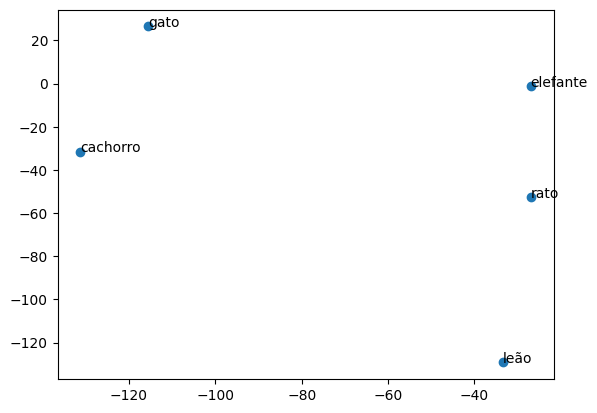

In [27]:
plt.scatter(embeddings_2d[:,0], embeddings_2d[:,1])
for i, doc in enumerate(words):
    plt.annotate(doc, (embeddings_2d[i,0], embeddings_2d[i,1]))
plt.show()